In [1]:
from pylab import *

In [33]:
def Mat_A(x_in,r):
    N = len(x_in)
    A = zeros((N,N))
    for i in range(N-1):
        A[i,i] = 2*(1+r)
        A[i,i+1] = -r #diagonal superior
        A[i+1,i] = -r #diagonal inferior
    A[-1,-1] = 2*(1+r)
    return A

def Met_CN(x,t,Psi_0,D):
    dx , dt = x[1]-x[0] , t[1]-t[0]
    r = (D*dt)/(dx**2)
    Psi_xt = zeros( ( len(x),len(t) ) )
    Psi_xt[:,0] = Psi_0
    if r < 1:
        print('Converge')
        A , B = Mat_A(x[1:-1],r) , Mat_A(x[1:-1],-r)
        Mevol = dot( inv(A) , B )
        for j in range(len(t)-1):
            Psi_xt[1:-1,j+1] = dot( Mevol , Psi_xt[1:-1,j] )
    else:
        print('Diverge')
    return Psi_xt

In [49]:
x = linspace(0,1,20)
t = linspace(0,1,500)
Psi_0 = x*(1-x)
Psi_total = Met_CN(x,t,Psi_0,0.5)

Converge


$$
\vec \Psi ^{j+1} = \mathbb{A}^{-1} \mathbb{B} \vec \Psi ^{j}
$$

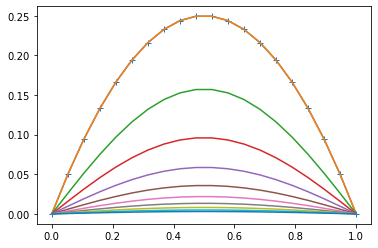

In [56]:
plot(x,Psi_0,'-+')
for i in range(10):
    plot(x,Psi_total[:,50*i])
show()

In [31]:
x_dentro = x[1:-1]

A = Mat_A(x_dentro,1)
B = Mat_A(x_dentro,-1)
